In [ ]:
import pandas as pd
import numpy as np

df= pd.read_csv("Salaries.csv")
df.info()

<ipython-input-1-052e4735ce61>:4: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("Salaries.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [ ]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [ ]:
df['BasePay'] = pd.to_numeric(df['BasePay'],errors = 'coerce')
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'],errors = 'coerce')
df['OtherPay'] = pd.to_numeric(df['OtherPay'],errors = 'coerce')
df['Benefits'] = pd.to_numeric(df['Benefits'],errors = 'coerce')

df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [ ]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
Status              0
dtype: int64

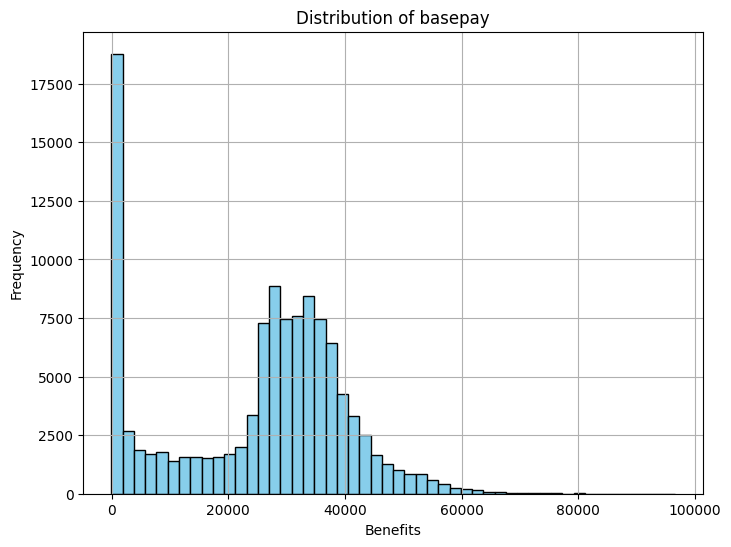

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(df['Benefits'] , bins = 50 , color = 'skyblue',edgecolor = 'black')
plt.xlabel('Benefits')
plt.ylabel('Frequency')
plt.title('Distribution of basepay')
plt.grid(True)
plt.show()

In [ ]:
print(df['BasePay'].median(),
df['Benefits'].median(),
df['Status'].mode())

65007.45 28628.62 0    FT
Name: Status, dtype: object


In [ ]:
df['BasePay']=df['BasePay'].fillna(65007.45)
df['Benefits']=df['Benefits'].fillna(28628.62)
df['Status']=df['Status'].fillna('FT')
df['OvertimePay']=df['OvertimePay'].fillna(0)
df['OtherPay']=df['OtherPay'].fillna(0)
df.drop(['Notes'],axis=1,inplace=True)

In [ ]:
df.isna().sum()


Id                   0
EmployeeName         0
JobTitle             0
BasePay              0
OvertimePay          0
OtherPay             0
Benefits             0
TotalPay             0
TotalPayBenefits     0
Year                 0
Agency               0
Status               0
JobTitlee            0
ratio               26
dtype: int64

# Q1:  What is the average BasePay across all job titles?

In [ ]:
df['JobTitlee']=df['JobTitle'].str.lower()
df.groupby("JobTitlee")['BasePay'].mean()


JobTitlee
account clerk                                     42785.535128
accountant                                        46643.172000
accountant i                                      61777.832500
accountant ii                                     66880.084425
accountant iii                                    78840.704029
                                                      ...     
worker's compensation supervisor i                90966.140000
x-ray laboratory aide                             46412.085794
youth comm advisor                                39077.957500
youth commission advisor, board of supervisors    52609.910000
zoo curator                                       43148.000000
Name: BasePay, Length: 1637, dtype: float64

select JobTite, AVG(BasePay) from SF
group by JobTitle

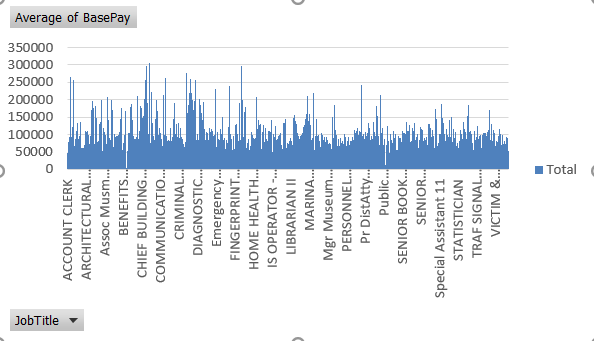

# Q2: Which job title has the highest BasePay?

In [ ]:
df[df['BasePay']==df['BasePay'].max()][['JobTitle','BasePay']]

,JobTitle,BasePay
72925,Chief of Police,319275.01


select BasePay,JobTitle from SF
WHERE BasePay =(
	select max(BasePay) from SF
)

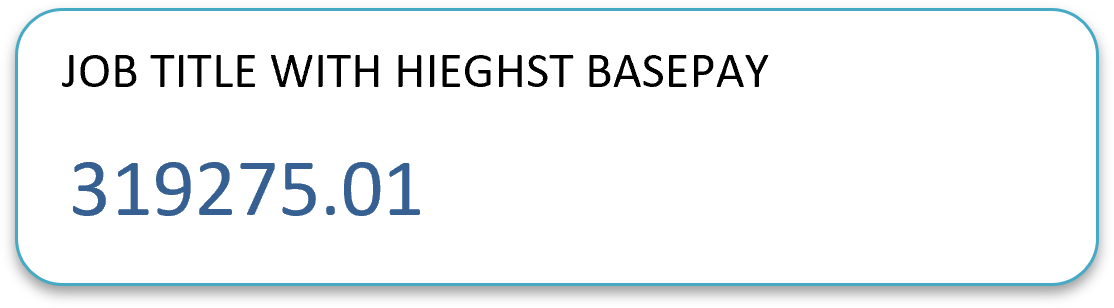

# Q3: How many unique job titles are there in the dataset?

In [ ]:
df['JobTitlee'].nunique()


1637

select count (DISTINCT JobTitle) from SF

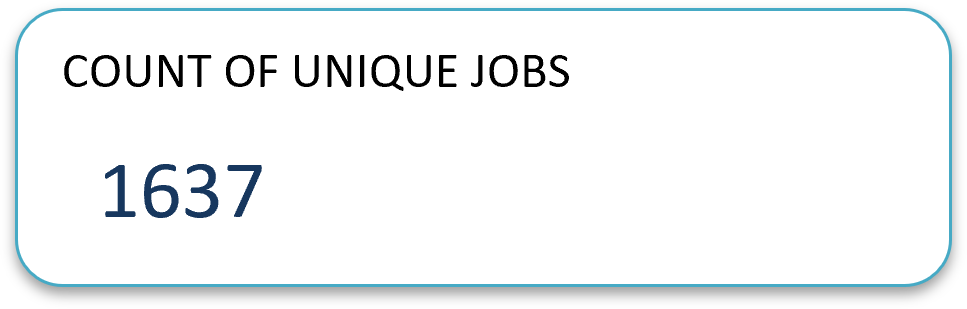

#Q4: What is the total OvertimePay for each year?

In [ ]:
df.groupby('Year')['OvertimePay'].sum()


Year
2011    1.638388e+08
2012    1.846910e+08
2013    1.986214e+08
2014    2.059186e+08
Name: OvertimePay, dtype: float64

select Year , sum(OvertimePay) from  SF
group by Year

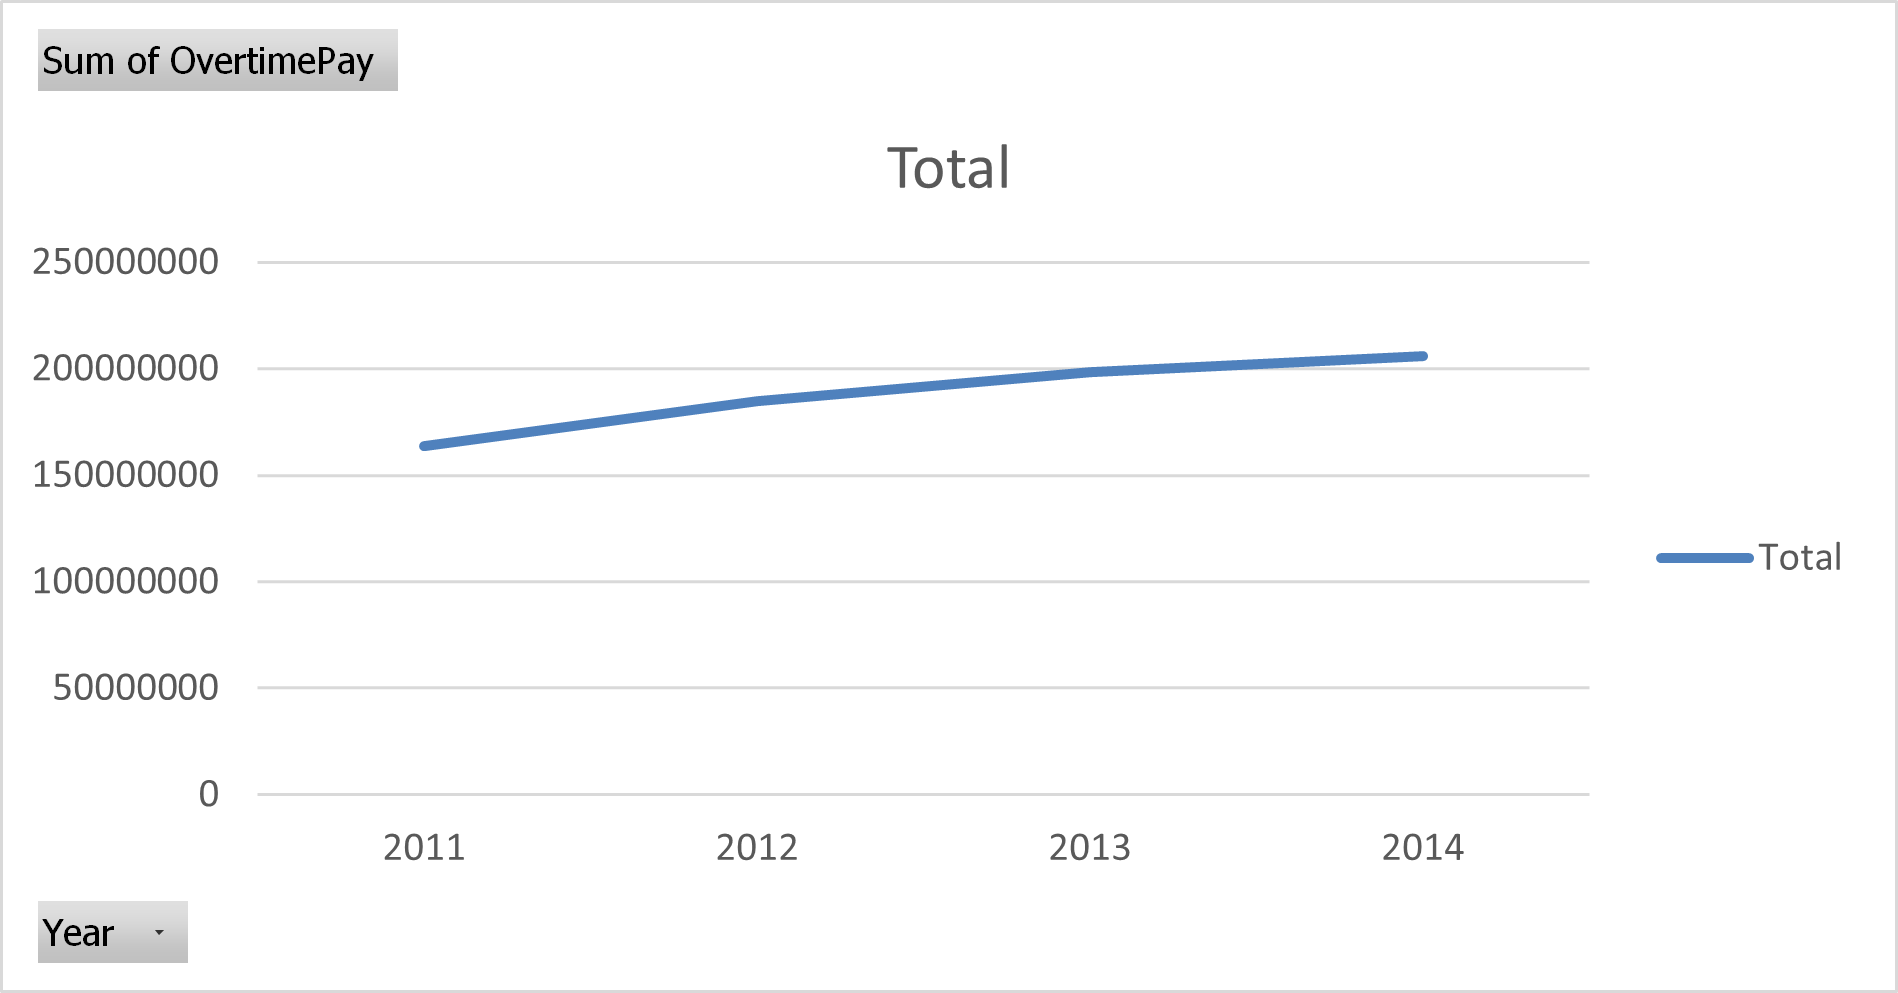

# Q5: Which year had the highest average OtherPay?

In [ ]:
year=df.groupby('Year')['OtherPay'].mean().idxmax()
avg=df.groupby('Year')['OtherPay'].mean().max()
print(year,avg)

2013 3819.969006807424


SELECT TOP 1 Year, AVG(OtherPay) as AvgOtherPay
FROM SF
GROUP BY Year
ORDER BY AvgOtherPay DESC;

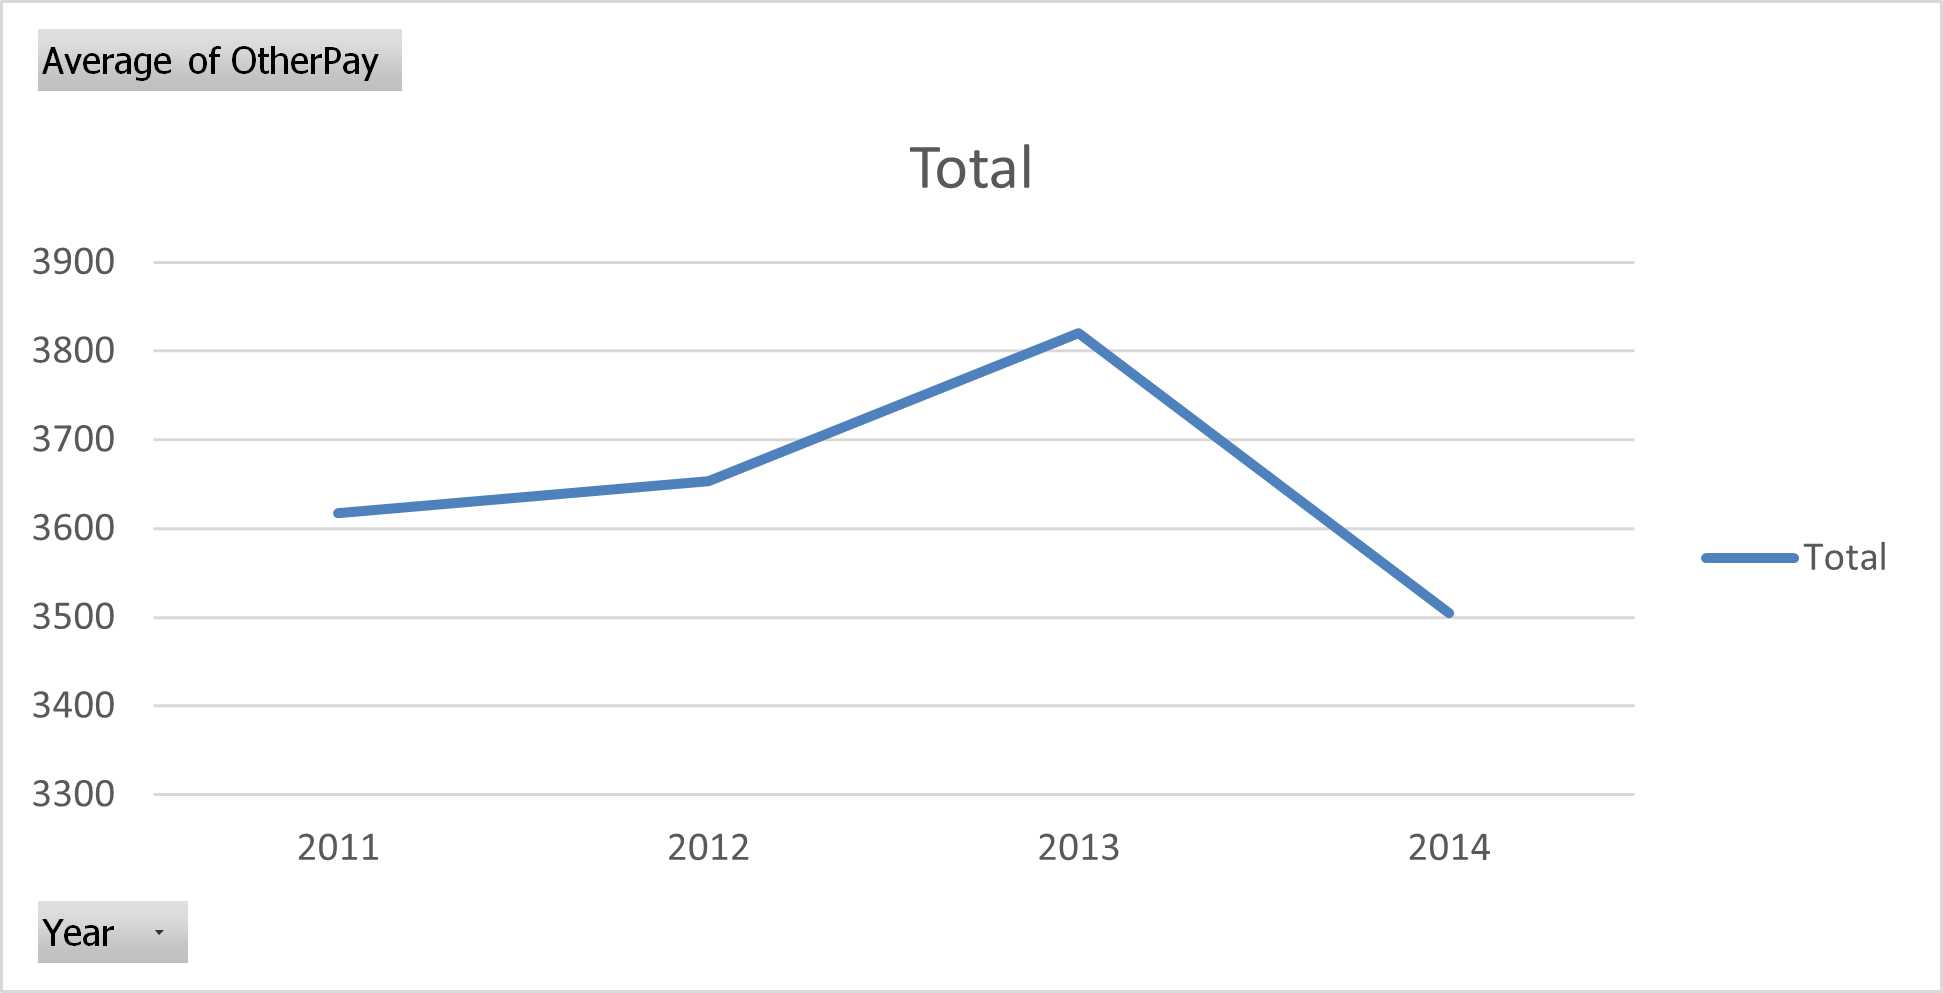

# Q6: What is the median TotalPay for each job title?

In [ ]:
df.groupby('JobTitlee')['TotalPay'].median()

JobTitlee
account clerk                                     50401.800
accountant                                        60076.240
accountant i                                      67403.330
accountant ii                                     69386.660
accountant iii                                    89570.445
                                                    ...    
worker's compensation supervisor i                92344.780
x-ray laboratory aide                             60176.955
youth comm advisor                                44449.895
youth commission advisor, board of supervisors    53632.870
zoo curator                                       66686.560
Name: TotalPay, Length: 1637, dtype: float64

WITH Median AS (
    SELECT
        JobTitle,
        PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY TotalPay) OVER (PARTITION BY JobTitle) AS MedianTotalPay
    FROM SF
)
SELECT DISTINCT JobTitle, MedianTotalPay
FROM Median
ORDER BY JobTitle;

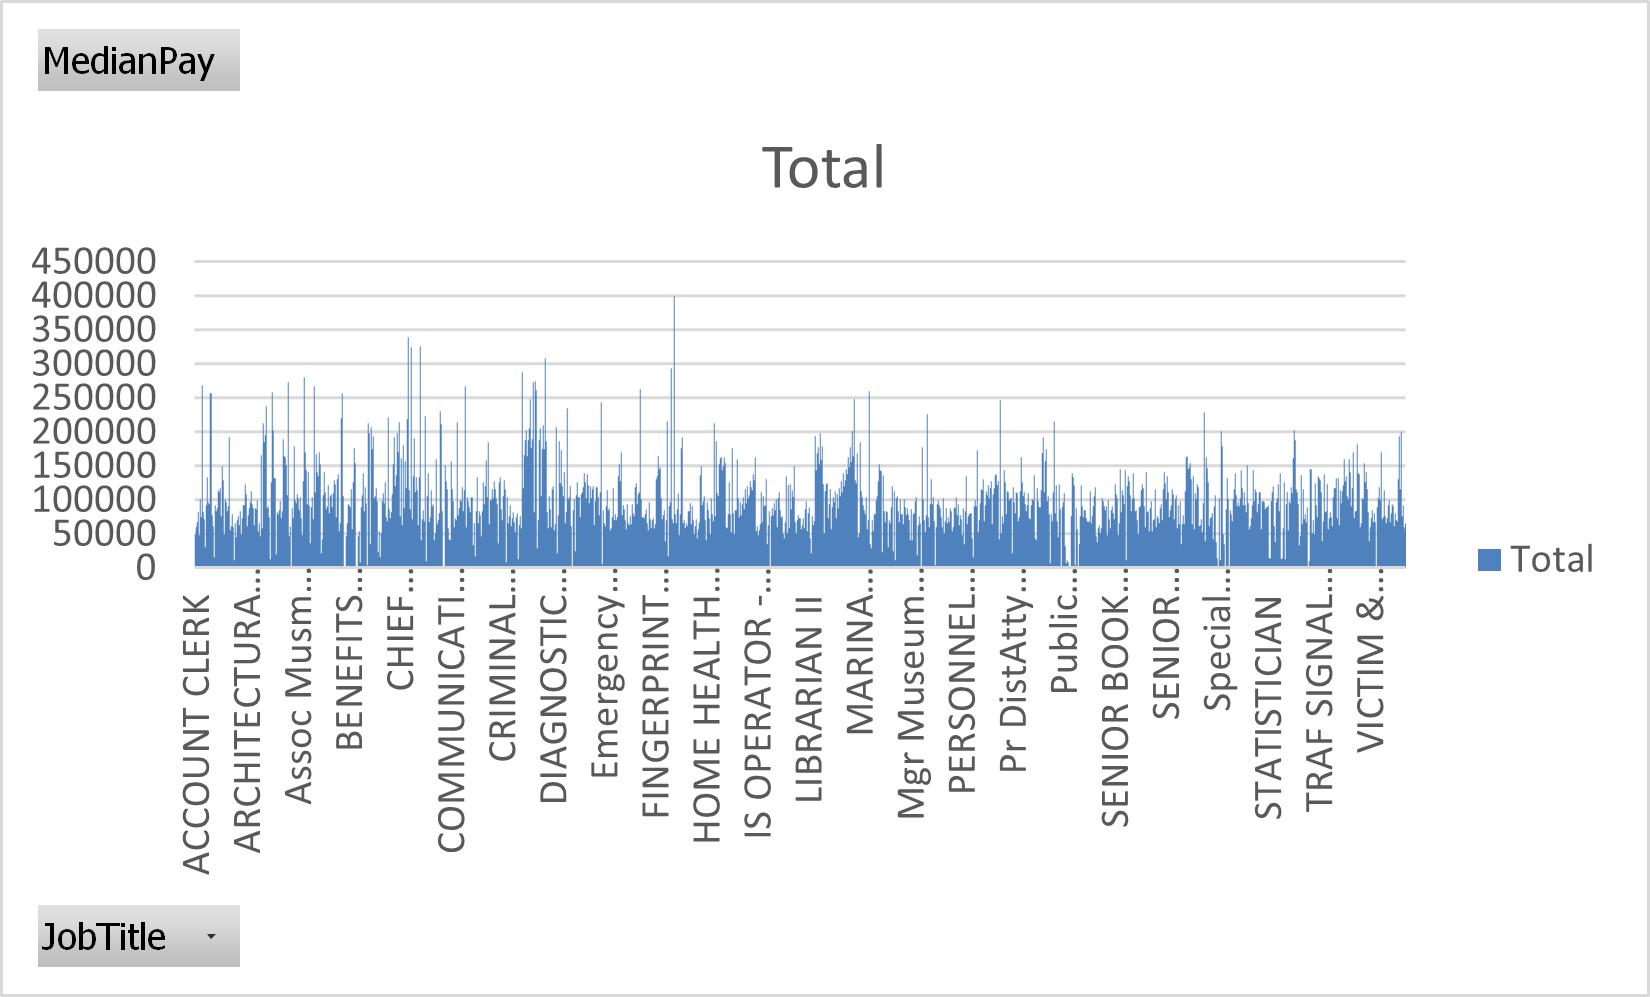

# Q7: How many employees are there in each agency?

In [ ]:
df['Agency'].value_counts()

Agency
San Francisco    148654
Name: count, dtype: int64

select Agency , count(EmployeeName) from  SF
group by Agency


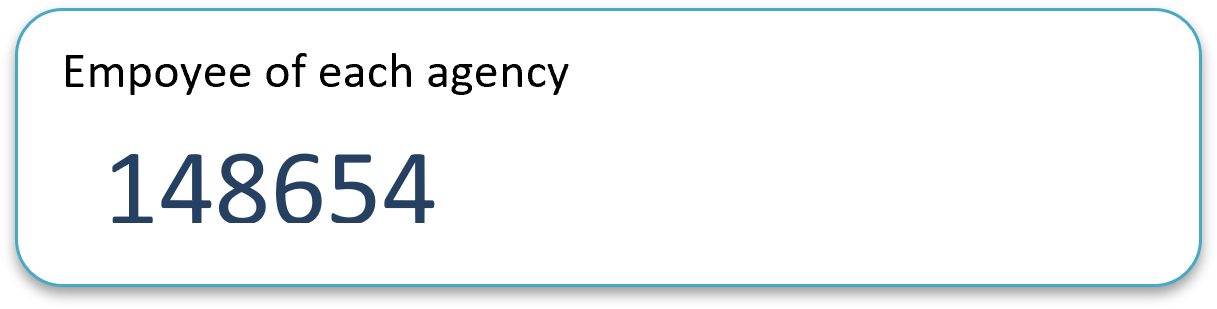

# Q8: What is the maximum Benefits offered by any agency?

In [ ]:
df.groupby('Agency')['Benefits'].max()

Agency
San Francisco    96570.66
Name: Benefits, dtype: float64

select Agency , max(Benefits) from  SF
group by Agency


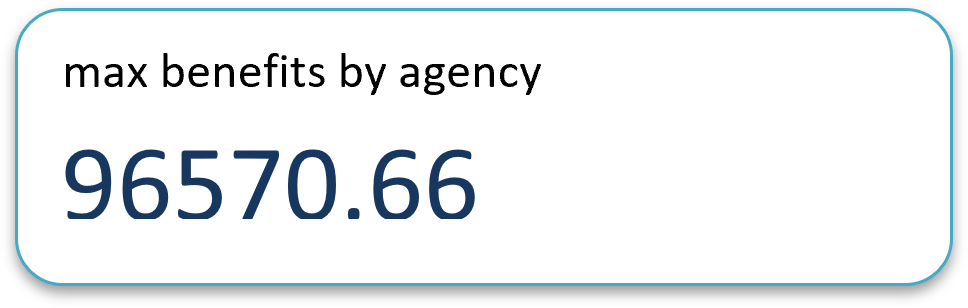

# Q9: What is the total BasePay, OvertimePay, and OtherPay for each employee?

In [ ]:
 df.groupby('EmployeeName')[['BasePay','OvertimePay','OtherPay']].sum()

,BasePay,OvertimePay,OtherPay
EmployeeName,,,
A BERNARD FATOOH,19969.37,0.00,70.54
A Bernard Fatooh,23908.50,0.00,15.12
A Bernard Fatooh,42533.70,0.00,27.84
A ELIZABETH MARCHASIN,23591.80,0.00,2691.06
A JAMIL NIAZI,69058.19,0.00,18438.02
...,...,...,...
Zun Jin Zhang He,105225.01,3691.82,6723.91
Zuna Luu,51502.86,0.00,1015.22
Zuna T Luu,109729.00,264.36,2249.99


SELECT EmployeeName,
    SUM(BasePay) AS TotalBasePay,
    SUM(OvertimePay) AS TotalOvertimePay,
    SUM(OtherPay) AS TotalOtherPay
FROM SF
GROUP BY  EmployeeName

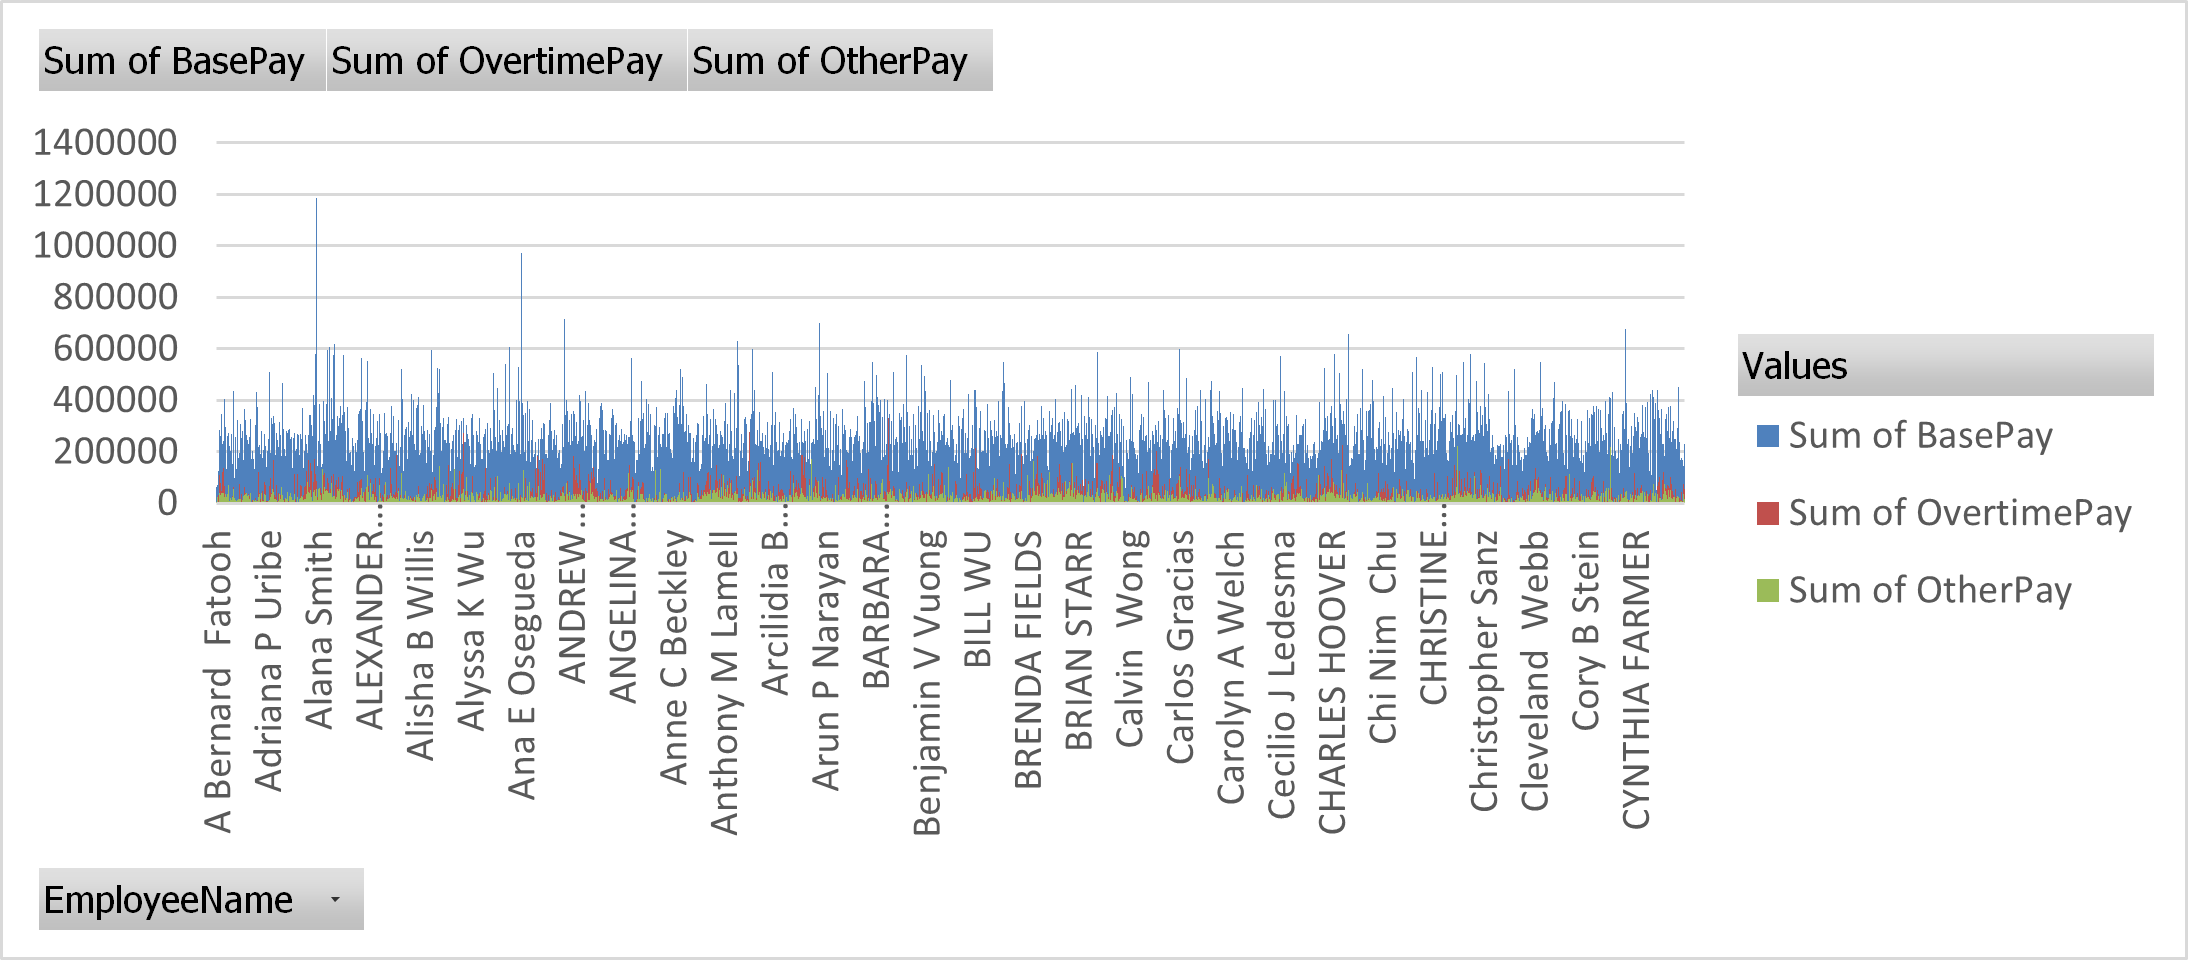

# Q10: Which employee has the highest TotalPayBenefits?

In [ ]:
 df[df['TotalPayBenefits']==df['TotalPayBenefits'].max()][['EmployeeName','TotalPayBenefits']]



,EmployeeName,TotalPayBenefits
0,NATHANIEL FORD,567595.43


SELECT top 1 EmployeeName,TotalPayBenefits FROM SF
order by TotalPayBenefits desc

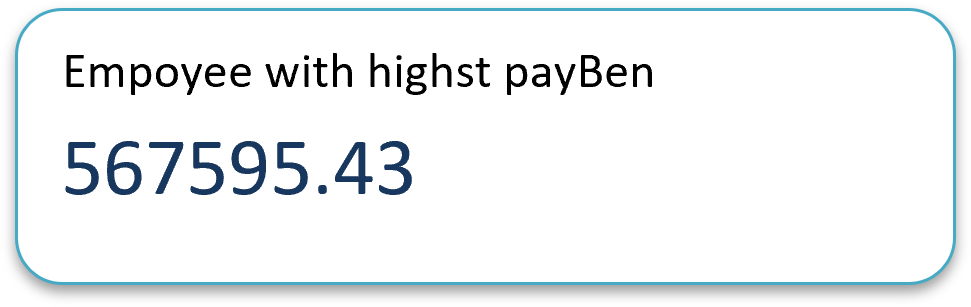

# Q11: How does the average TotalPayBenefits vary across years?

In [ ]:
 df.groupby('Year')['TotalPayBenefits'].mean()

Year
2011     71744.103871
2012    100553.229232
2013    101440.519714
2014    100250.918884
Name: TotalPayBenefits, dtype: float64

select Year , avg(TotalPayBenefits) from SF
group by Year

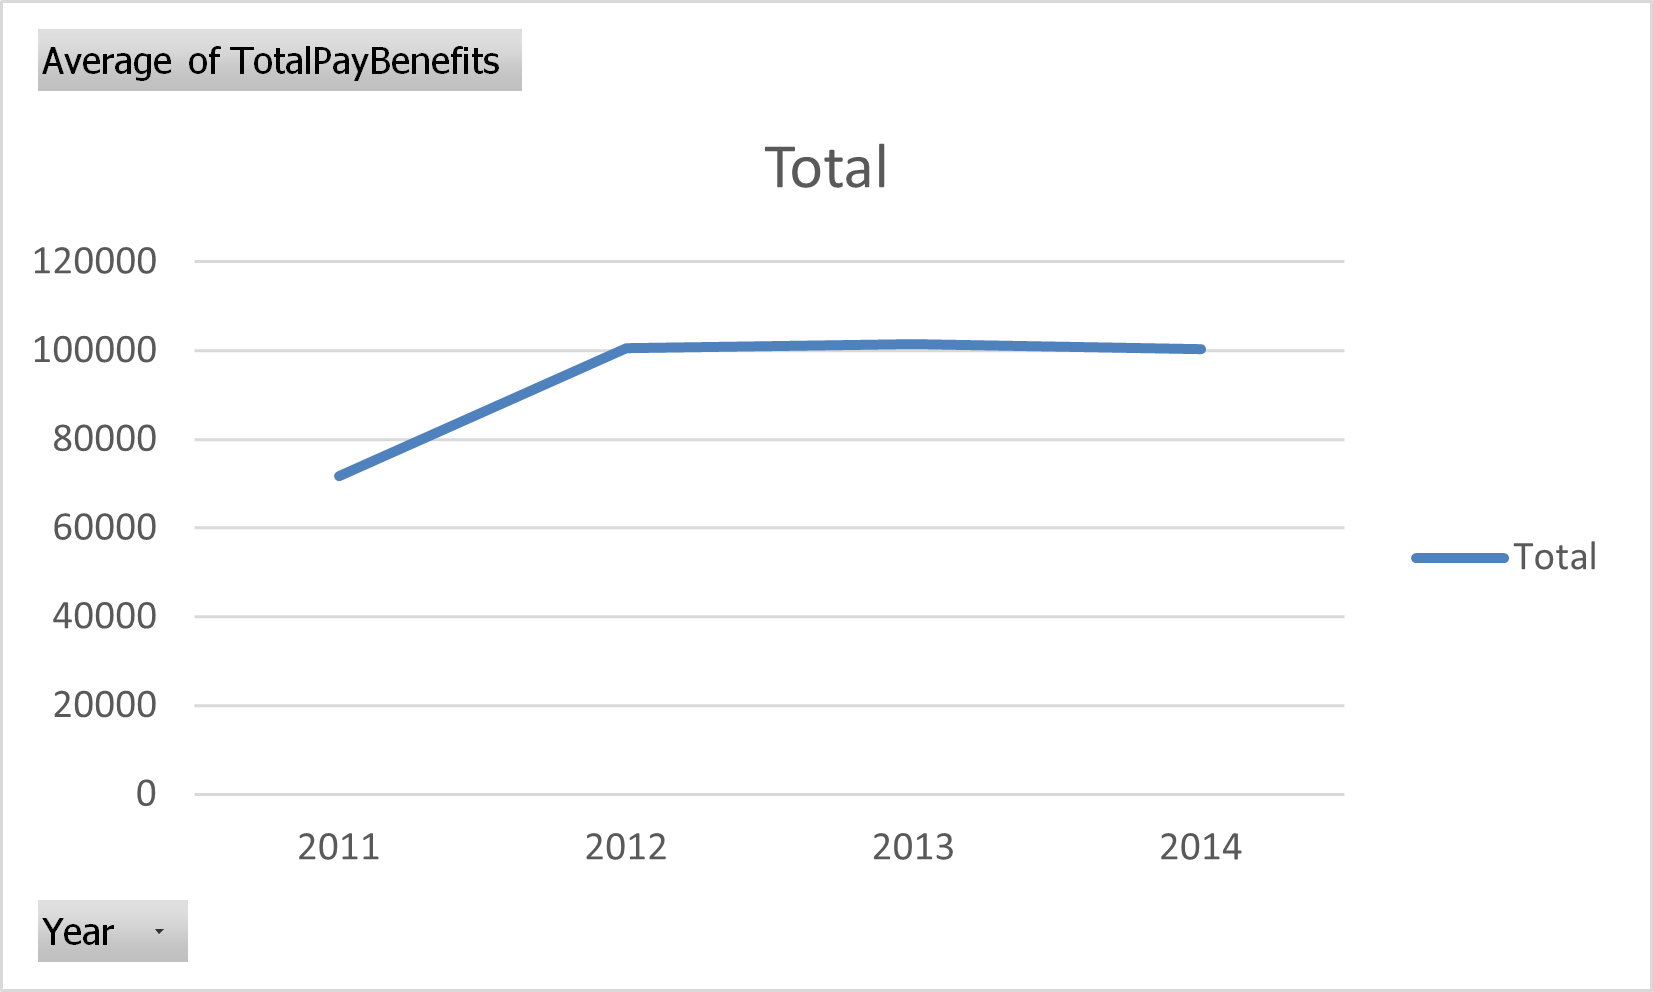

# Q12: What is the total BasePay for each status (full-time, part-time, etc.)

In [ ]:
 df.groupby('Status')['BasePay'].sum()

Status
FT    9.357651e+09
PT    5.010892e+08
Name: BasePay, dtype: float64

select Status , sum(BasePay) from SF
group by Status

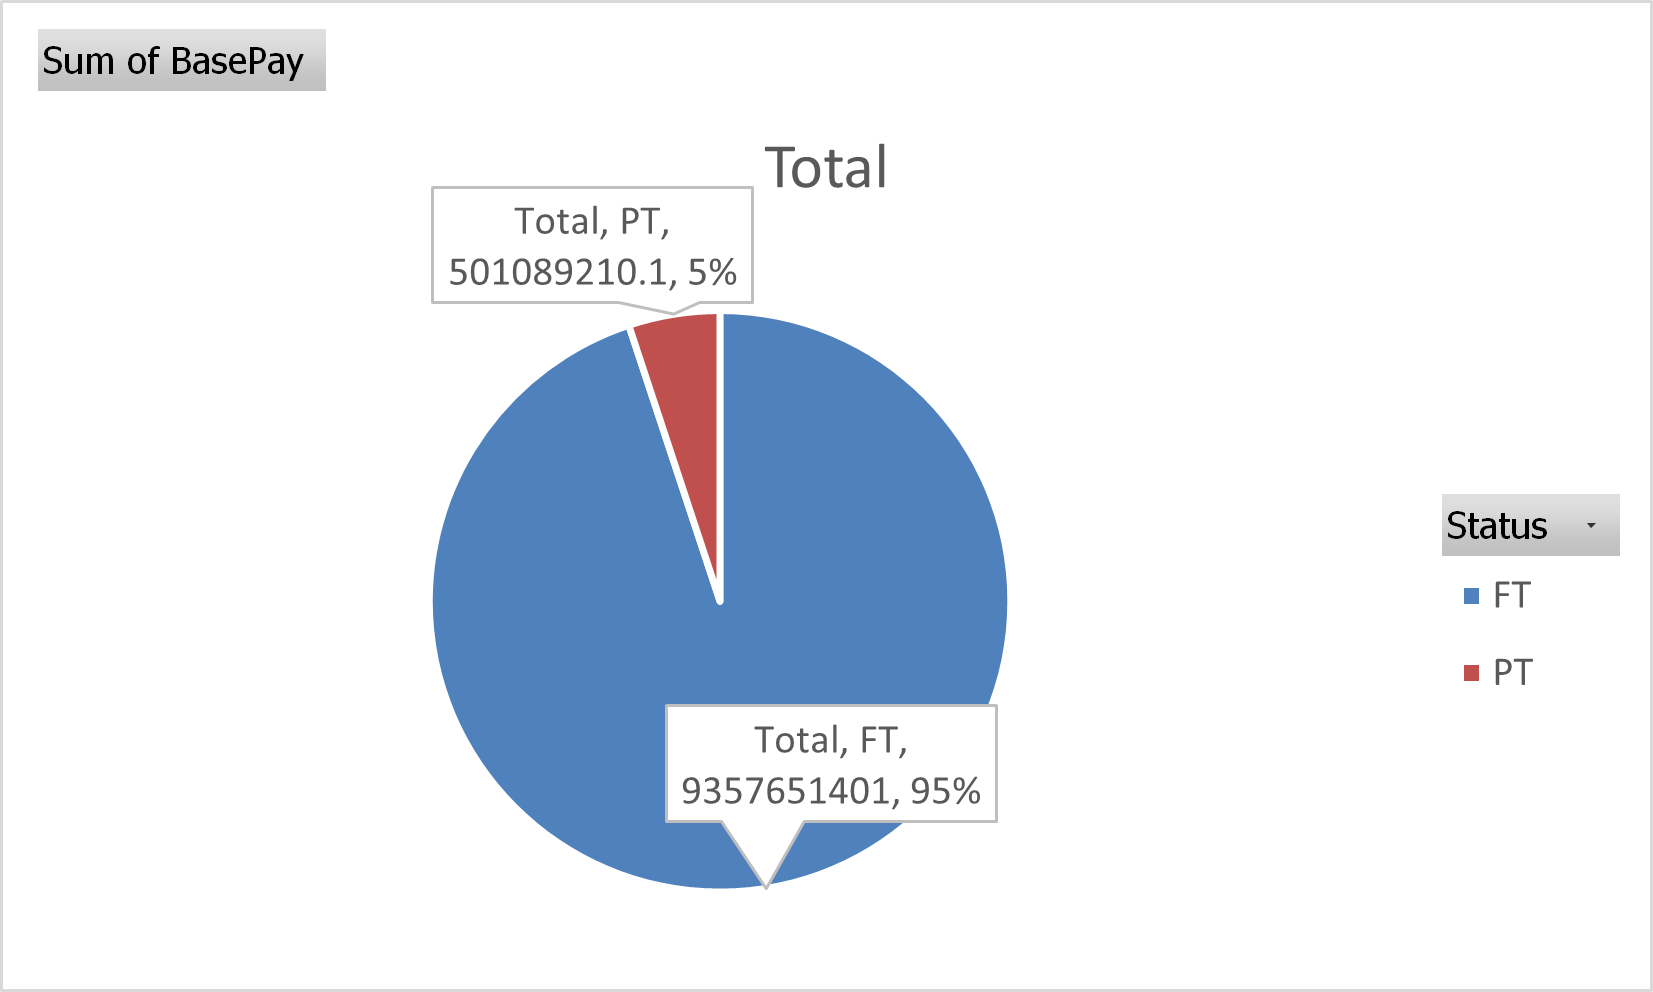

# Q13: How many employees are there for each job title in each agency?

In [ ]:
 df.groupby(['Agency','JobTitlee'])['EmployeeName'].count()

Agency         JobTitlee                                     
San Francisco  account clerk                                     351
               accountant                                          5
               accountant i                                        8
               accountant ii                                     226
               accountant iii                                    278
                                                                ... 
               worker's compensation supervisor i                  5
               x-ray laboratory aide                             126
               youth comm advisor                                  4
               youth commission advisor, board of supervisors      1
               zoo curator                                         1
Name: EmployeeName, Length: 1637, dtype: int64

select Agency , JobTitle , count (EmployeeName) from SF
group by Agency , JobTitle

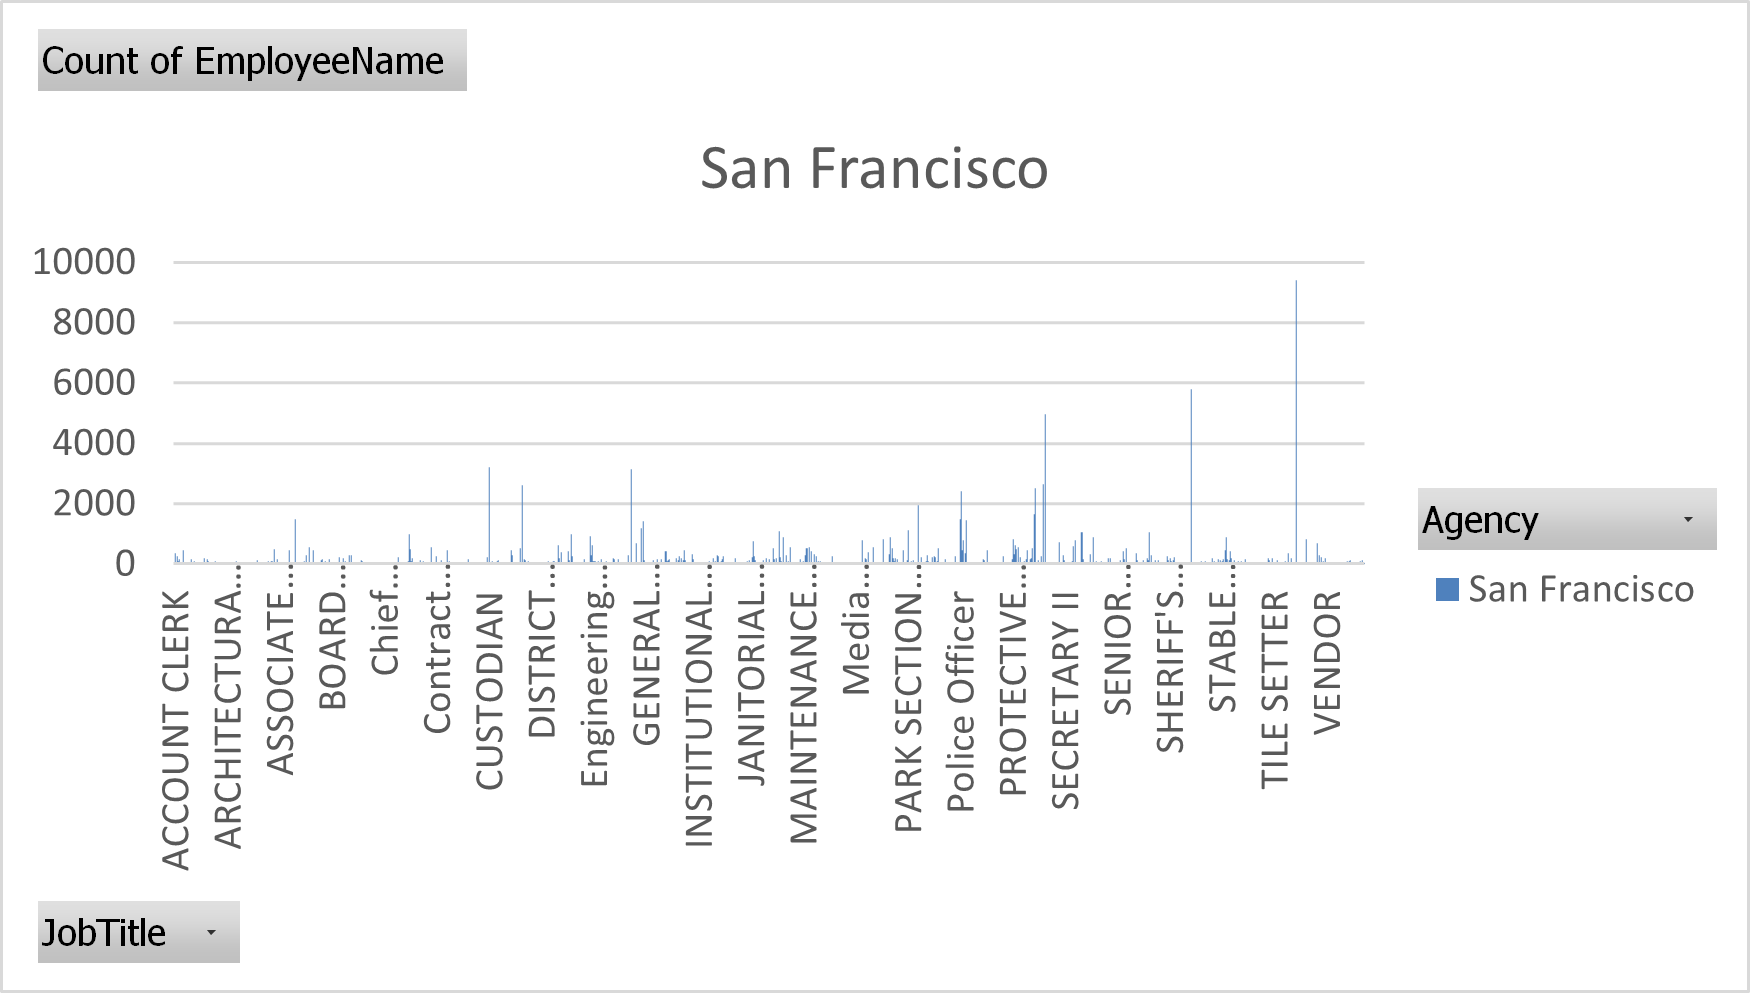

# Q14: Which job title has the highest average Benefits?

In [ ]:
jt=df.groupby('JobTitle')['Benefits'].mean().idxmax()
avg_ben=df.groupby('JobTitle')['Benefits'].mean().max()
print(jt,avg_ben)

Chief Investment Officer 96570.66


select top 1 JobTitle , avg(Benefits) as AVGBen from SF
group by JobTitle
order by AVGBen desc

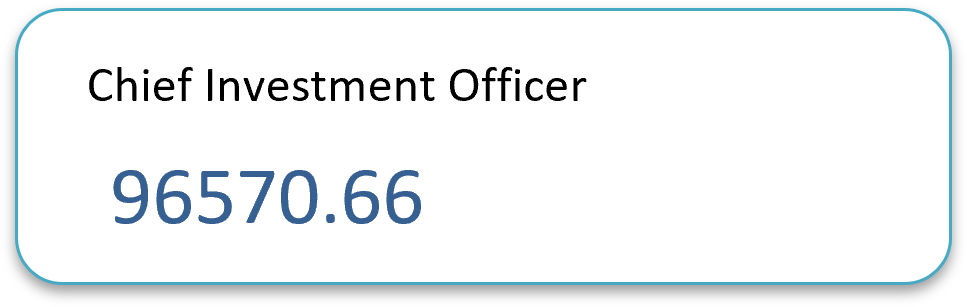

# Q15: What is the ratio of BasePay to TotalPayBenefits for each job title?

In [ ]:
 df['ratio']=df['BasePay']/df['TotalPayBenefits']
 df.groupby('JobTitlee')['ratio'].mean()

JobTitlee
account clerk                                     0.875874
accountant                                        0.787718
accountant i                                      0.701642
accountant ii                                     0.704785
accountant iii                                    0.871683
                                                    ...   
worker's compensation supervisor i                0.999360
x-ray laboratory aide                             0.764359
youth comm advisor                                0.631575
youth commission advisor, board of supervisors    0.980927
zoo curator                                       0.647027
Name: ratio, Length: 1637, dtype: float64

In [ ]:
df.groupby('JobTitlee')[['BasePay','TotalPayBenefits']].corr()

BasePay  \
JobTitlee                                                                   
account clerk                                  BasePay           1.000000   
                                               TotalPayBenefits  0.878025   
accountant                                     BasePay           1.000000   
                                               TotalPayBenefits  0.999220   
accountant i                                   BasePay           1.000000   
...                                                                   ...   
youth comm advisor                             TotalPayBenefits  0.999548   
youth commission advisor, board of supervisors BasePay                NaN   
                                               TotalPayBenefits       NaN   
zoo curator                                    BasePay                NaN   
                                               TotalPayBenefits       NaN   

                                                                 TotalPayBenefits  
JobTitlee                                                                          
account clerk                                  BasePay                   0.878025  
                                               TotalPayBenefits          1.000000  
accountant                                     BasePay                   0.999220  
                                               TotalPayBenefits          1.000000  
accountant i                                   BasePay                   0.996481  
...                                                                           ...  
youth comm advisor                             TotalPayBenefits          1.000000  
youth commission advisor, board of supervisors BasePay                        NaN  
                                               TotalPayBenefits               NaN  
zoo curator                                    BasePay                        NaN  
                                               TotalPayBenefits               NaN  

[3274 rows x 2 columns]

# Q16: Which job title has the highest ratio of BasePay to TotalPayBenefits?

In [ ]:
df[df['JobTitlee']==df["JobTitlee"].max()][['BasePay','TotalPayBenefits']].corr()


,BasePay,TotalPayBenefits
BasePay,NaN,NaN
TotalPayBenefits,NaN,NaN


In [ ]:
df.groupby('JobTitlee')['ratio'].mean().idxmax()

'senior assessment clerk'

# Q17: How many years of data are available in the dataset?

In [ ]:
 df['Year'].nunique()

4

select COUNT (DISTINCT Year) from SF

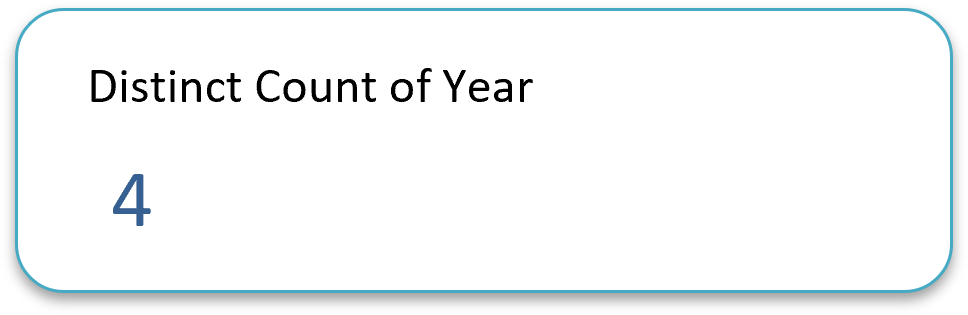

# Q18: What is the average BasePay for each year and job title combination?

In [ ]:
 df.groupby(['Year','JobTitle'])['BasePay'].mean()

Year  JobTitle                      
2011  ACCOUNT CLERK                     43300.806506
      ACCOUNTANT                        46643.172000
      ACCOUNTANT INTERN                 28732.663958
      ACUPUNCTURIST                     66374.400000
      ADMINISTRATIVE ANALYST            63435.628602
                                            ...     
2014  Wire Rope Cable Maint Sprv        93904.720000
      Worker's Comp Supervisor 1        54505.333333
      Worker's Compensation Adjuster    69915.985385
      X-Ray Laboratory Aide             45490.340286
      Youth Comm Advisor                32417.420000
Name: BasePay, Length: 4137, dtype: float64

select JobTitle, Year ,avg(BasePay) from SF
group by Year , JobTitle
order by Year

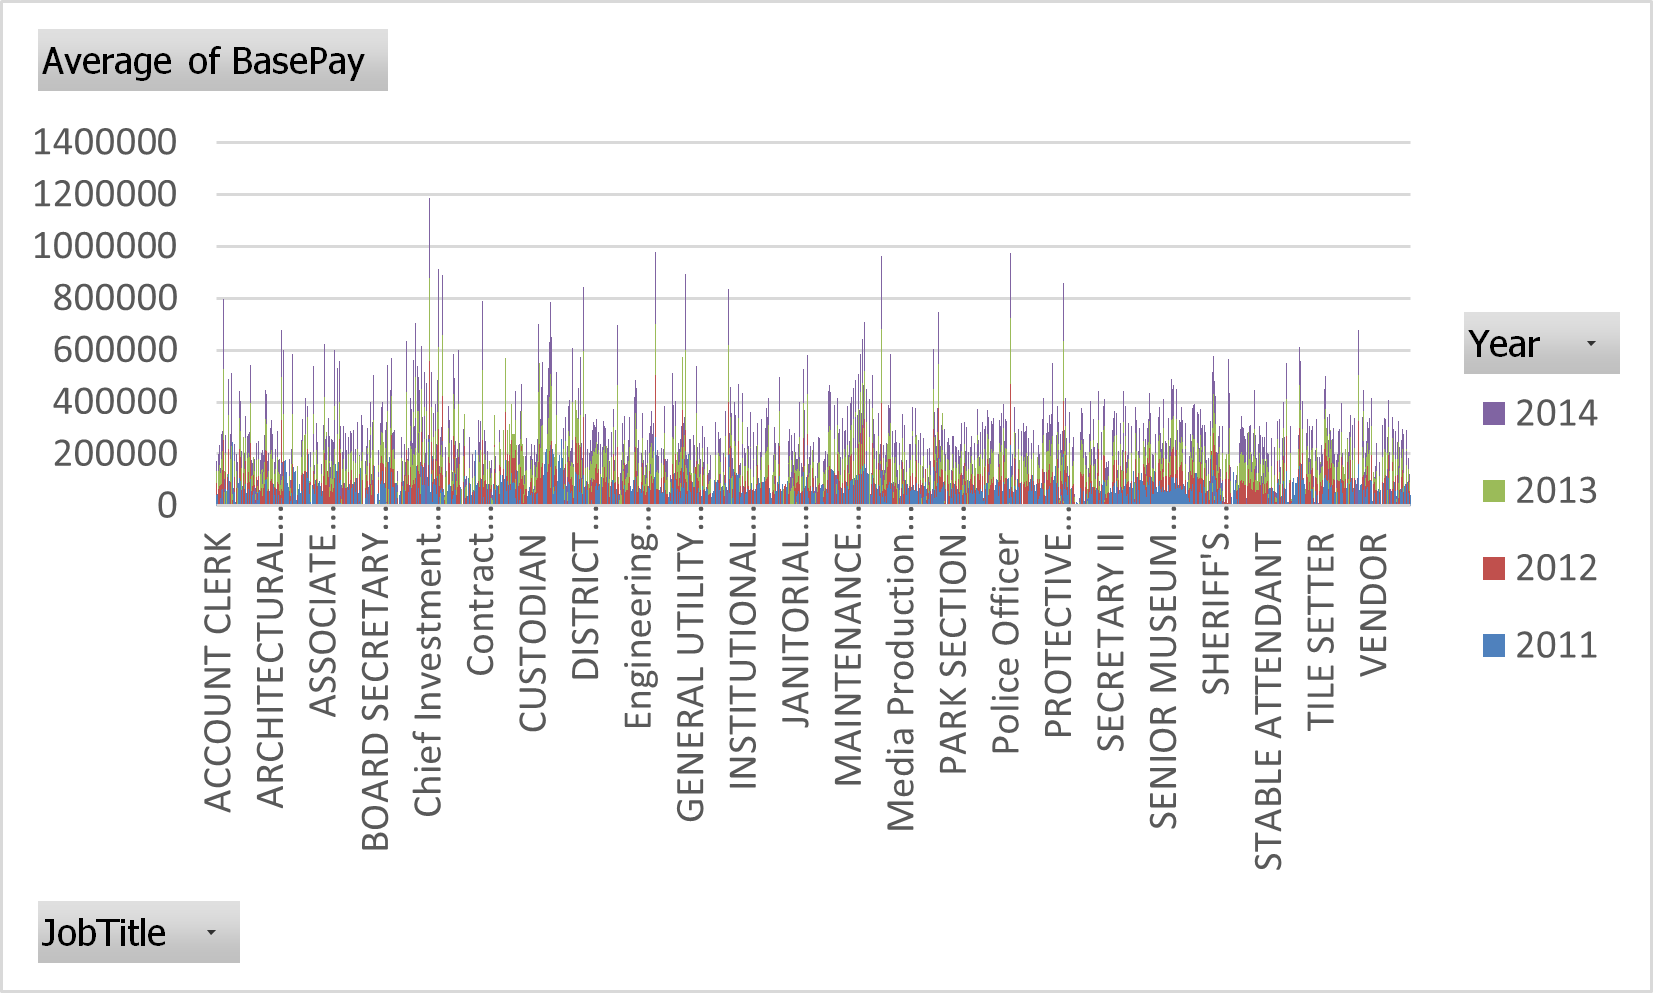

# Q19: How many employees have a TotalPayBenefits greater than $326373.19?

In [ ]:
 df[df['TotalPayBenefits']>326373.19]['EmployeeName'].count()

144

select EmployeeName , TotalPayBenefits from SF
where TotalPayBenefits > 326373.19
for number only......
select count(*) from SF
where TotalPayBenefits > 326373.19

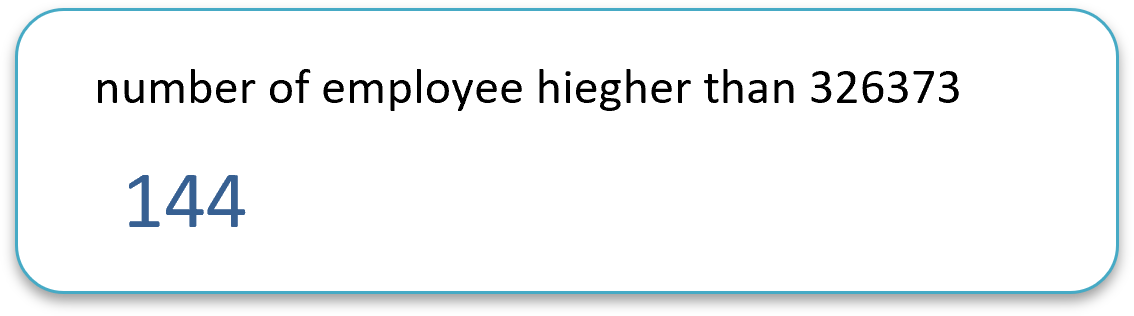

# Q20: Which agency has the highest average TotalPayBenefits?

In [ ]:
 df.groupby('Agency')['TotalPayBenefits'].mean().idxmax()

'San Francisco'

select top 1 Agency , avg(TotalPayBenefits) as avgTotalPayBenefits from SF
group by Agency
order by avgTotalPayBenefits

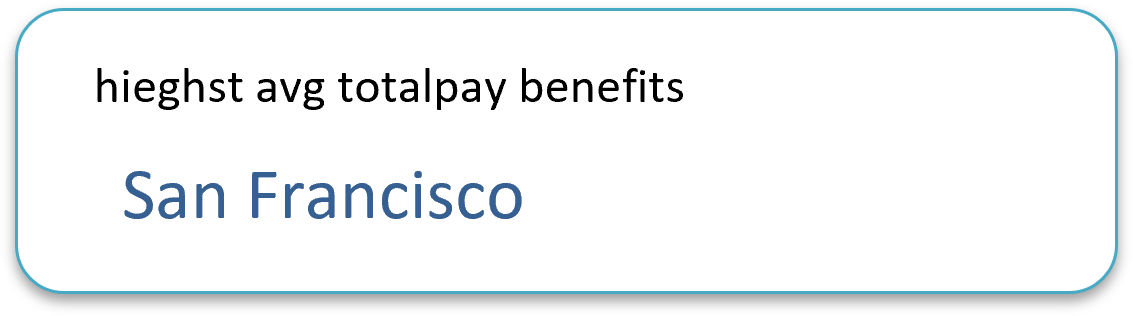

#Power BI Charst


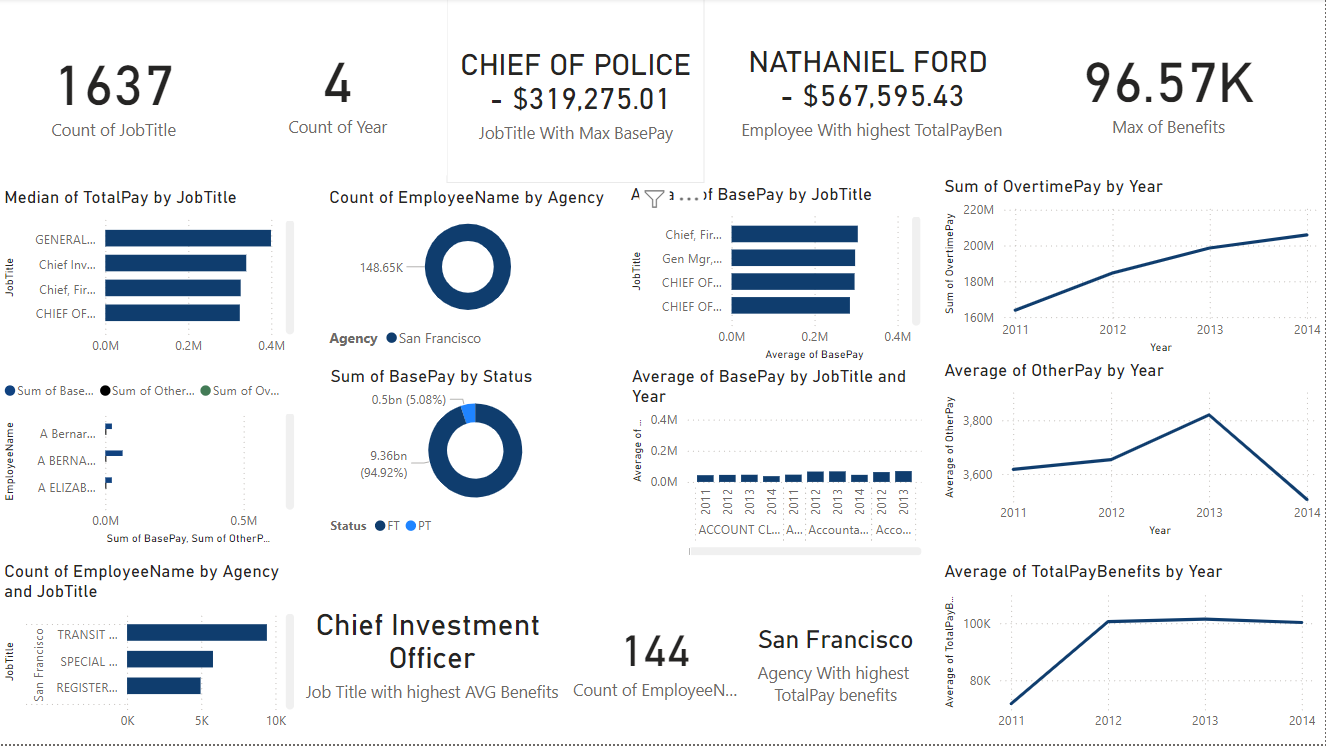